In [1]:
# Dataset

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
X, Y = make_circles(n_samples = 500, noise = 0.02)

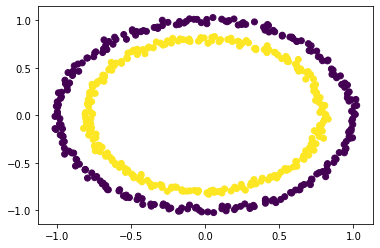

In [3]:
plt.scatter(X[:, 0],X[:,1], c = Y)

In [4]:
# Visualization in 3D
%matplotlib notebook

def plot3D(X, show = True):
    fig = plt.figure(figsize = (7, 7))
    ax  = fig.add_subplot(111, projection = '3d')
    
    x3 = X[:, 0] **2 + X[:, 1] **2
    
    ax.scatter(X[:, 0], X[:, 1], x3, zdir = 'z', s = 20, c = Y, depthshade = True)
    
    if show == True:
        plt.show()
        
    else:
        return ax

<IPython.core.display.Javascript object>


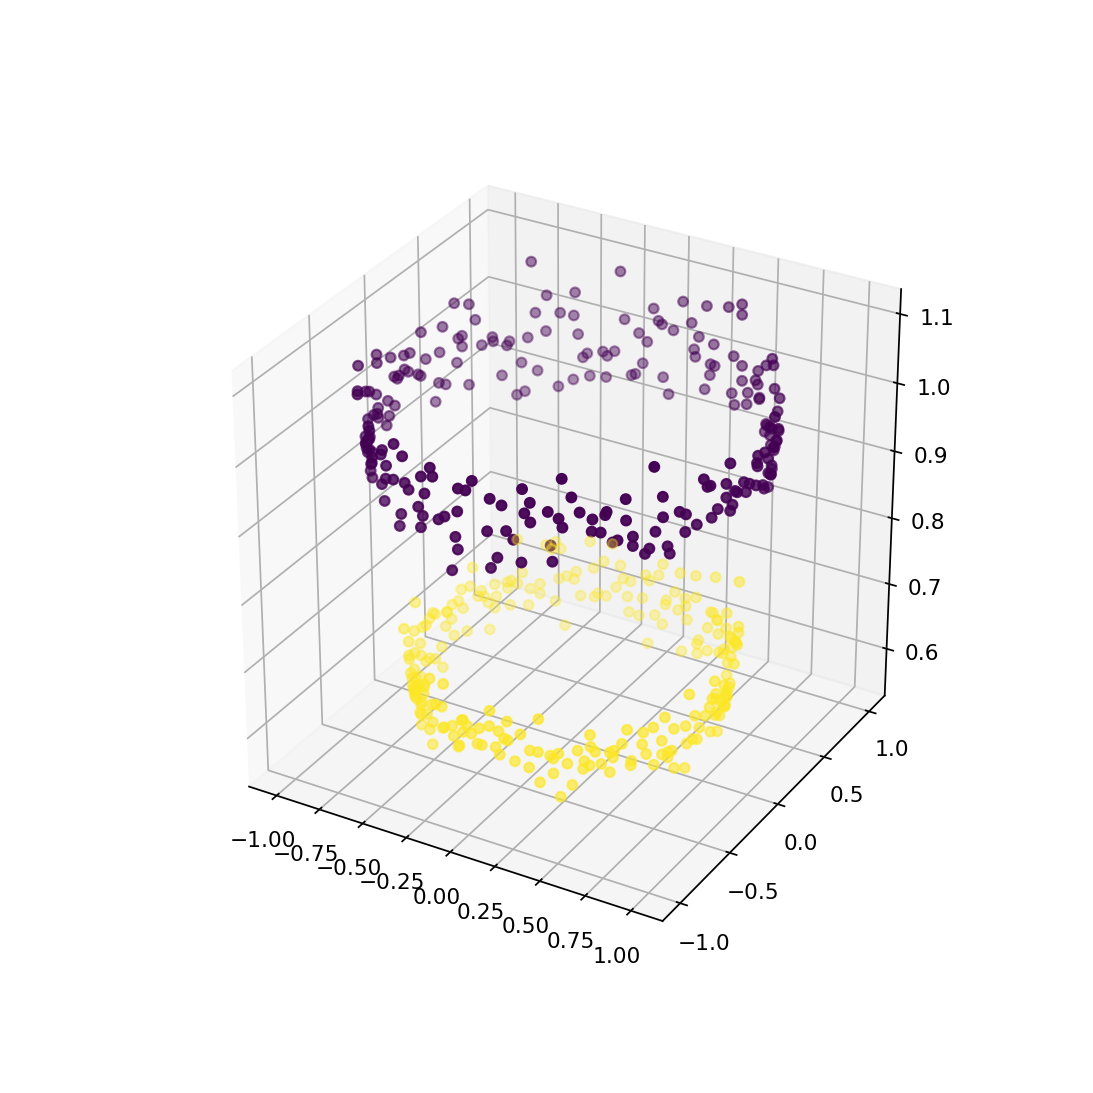

In [5]:
plot3D(X)

# Applying Logistic Regression 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [7]:
lr = LogisticRegression()
accuracy = cross_val_score(lr, X, Y, cv = 5)

In [8]:
accuracy

array([0.41, 0.42, 0.48, 0.46, 0.43])

In [9]:
# Mean Accuracy 

print("Accuracy 2D :", accuracy.mean() * 100)

Accuracy 2D : 44.00000000000001


# Logistic Regression on higher dimension

In [10]:
X_new = np.zeros((X.shape[0], 3))

In [11]:
X_new[:, :-1] = X
X_new[:, -1]  = X[:, 0] **2 + X[:, 1] **2

In [12]:
accuracy = cross_val_score(lr, X_new, Y, cv = 5 )
print("Accuracy 3D : ", accuracy.mean() * 100)

Accuracy 3D :  100.0


# Visualize Decision Surface

In [13]:
lr.fit(X_new, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
lr.coef_

array([[  0.01128149,   0.03929931, -10.9304842 ]])

In [15]:
lr.intercept_

array([8.92234132])

In [16]:
weights = list(lr.coef_[0][:])
weights.append(lr.intercept_[0])

In [17]:
weights

[0.011281489016738632,
 0.03929931306496498,
 -10.93048419570644,
 8.922341318691284]

In [18]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [19]:
z = -(weights[0] * xx + weights[1] * yy + weights[3])/weights[2]
print(z)

[[0.80702552 0.80805763 0.80908975 0.81012186]
 [0.81062091 0.81165302 0.81268513 0.81371725]
 [0.81421629 0.81524841 0.81628052 0.81731263]
 [0.81781168 0.81884379 0.81987591 0.82090802]]


<IPython.core.display.Javascript object>


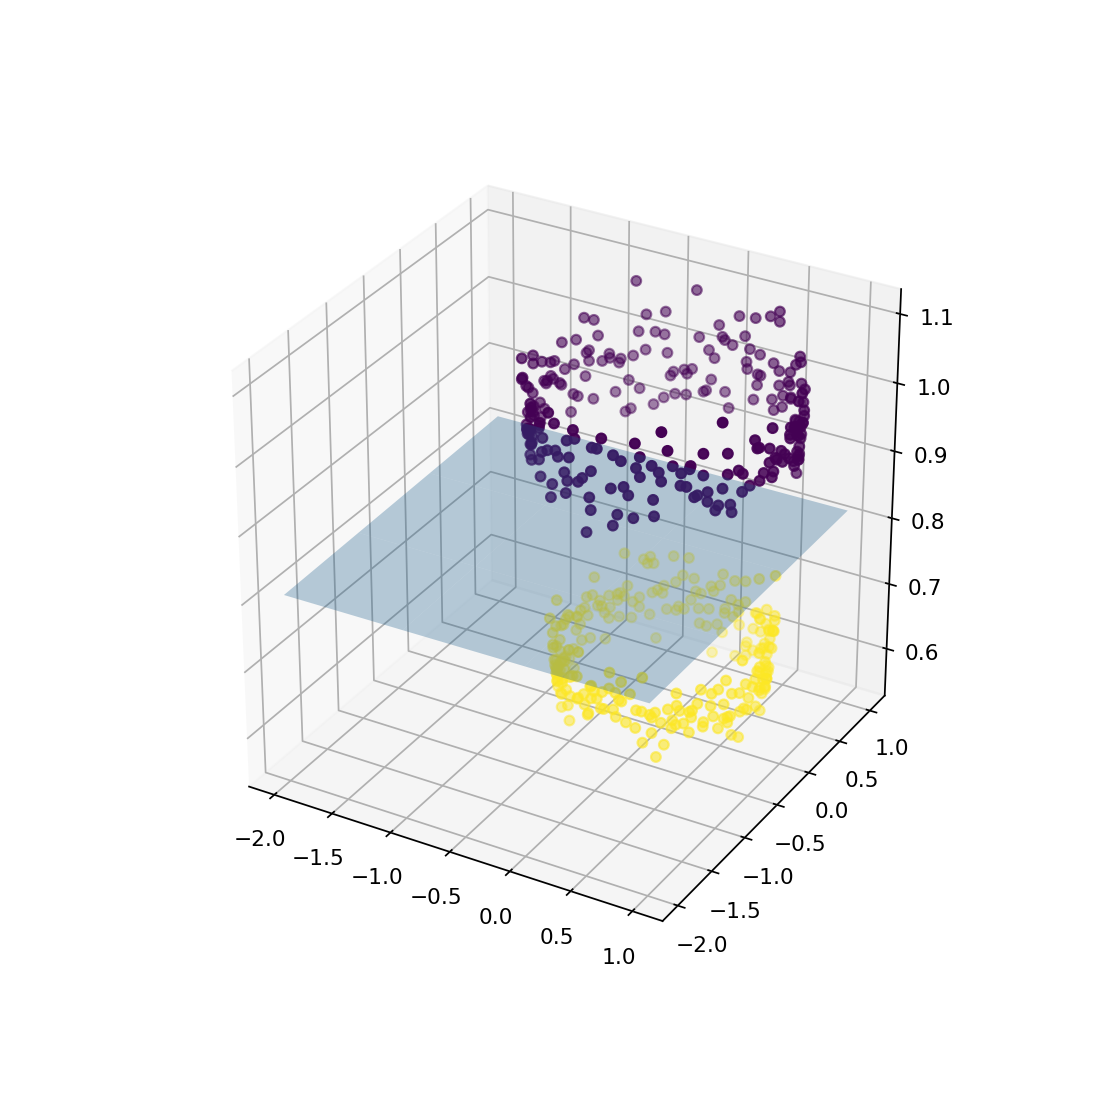

In [20]:
axis = plot3D(X_new, False)
axis.plot_surface(xx, yy, z, alpha = 0.3)
plt.show()